In [1]:
# !pip install pycaret

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from pycaret.utils import enable_colab
# enable_colab()

In [4]:
# !pip install pingouin
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
# import pingouin as pg

In [5]:
# #!pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [6]:
# link = 'https://drive.google.com/file/d/1EQWlNJYEis0AfgNejcp_8fFVCDMMdrwE/view?usp=sharing'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

In [7]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Filename.csv')  
# df3 = pd.read_csv('Filename.csv')
# # Dataset is now stored in a Pandas Dataframe


In [8]:
url = 'https://media.githubusercontent.com/media/maryclarecc/project4/main/2016-2017%20Excel%20(final%20version).csv'
df = pd.read_csv(url)
df2 = df.replace("#NULL!", 0)
# df.head()
# df.tail()
df2 = df2.drop(["schoolnum"], axis = 1)
# dfconf.head()

/var/folders/08/k5qj0k9j1dbgppb_7vzc5rnm0000gn/T/ipykernel_35878/4185617086.py:2: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [9]:
# notarg = dfconf.drop(["dx_dep1"], axis=1)
# notarg.head()

In [10]:
# NEW PROCESSING -- Categorical "#NULL!" to NaN
# df.loc[ df["sex_birth"] == "#NULL!", "sex_birth"] = np.nan
# df.loc[ df["gender"] == "#NULL!", "gender"] = np.nan
# df.loc[ df["sexual"] == "#NULL!", "sexual"] = np.nan
# df.loc[ df["relship"] == "#NULL!", "relship"] = np.nan
# df.loc[ df["schoolnum"] == "#NULL!", "schoolnum"] = np.nan
# df.loc[ df["age"] == "#NULL!", "age"] = np.nan


In [11]:
# NEW PROCESSING -- Categorical NaN replace with blank ""
# c = df.select_dtypes(np.number).columns
# df[c] = df[c].fillna(0)
# df = df.fillna("")
# df.tail()

In [12]:
df3 = df2.apply(pd.to_numeric)
# df3.dtypes.tolist()

In [13]:
df3['height_total'] = df3['height_ft']*12 + df3['height_in']
df3 = df3.loc[df3["wgt_lbs"] < 401,:] 
df3 = df3.loc[df3["height_total"] < 80,:] 
df3["bmi"] = df3["wgt_lbs"] / df3['height_total']**2 * 703
df3.shape

(52525, 480)

In [14]:
# df3["wgt_lbs"].sort_values(ascending=False).head(100)

In [15]:
# df3["height_total"].sort_values(ascending=False).head(100)

In [16]:
df4 = df3.drop(["wgt_lbs", "height_ft", "height_in", "height_total"], axis = 1)
dfclean = df4.loc[df4["bmi"] > 10] 
dfclean = dfclean.loc[dfclean["bmi"] < 50]
dfclean.shape
dfclean.head()

,age,sex_birth,gender,sexual,relship,race_black,race_ainaan,race_asian,race_his_temp,race_pi,...,sch_RhodeIslandCollege,sch_UNCG,dx_dep1,dx_anx,dx_attl,dx_ea1,dx_psy1,dx_pers,dx_sa1,bmi
0,20.0,1,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25.386111
1,21.0,1,2,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,21.031478
2,35.0,1,2,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.296306
3,22.0,2,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,22.044766
4,19.0,2,1,1,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,26.443866


In [17]:
notarg = dfclean.drop(["dx_dep1"], axis=1)
notarg.shape

(47288, 475)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [19]:
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the data.
df_pca = pca.fit_transform(notarg)

pcaArray = (abs(pca.components_))

In [20]:
pcaDF = pd.DataFrame(pcaArray)
# pcaDF.to_csv("pcaDF.csv")

# return the transpose
result = pcaDF.transpose()
result.shape
pcaDF.shape

(2, 475)

In [21]:
col = []
length = len(notarg.columns)

for i in range(0,length):
    name = notarg.columns[i]
    col.append(name)

result['Variables'] = col

# pd.set_option('display.max_rows', None)
result.sort_values(by=[0], ascending=False).head(10)


,0,1,Variables
16,0.990341,0.001413,hours_work_paid
0,0.101185,0.075204,age
474,0.044306,0.049945,bmi
58,0.026490,0.002090,residenc
55,0.019618,0.001331,timeclass
295,0.017209,0.007900,BRS_1
297,0.015394,0.006874,BRS_3
299,0.015217,0.008027,BRS_5
262,0.014814,0.021784,belong8
18,0.014793,0.007128,educ_par2


In [22]:
dffinal = dfclean[["hours_work_paid", "age", "bmi", "residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2", "dx_dep1"]]


In [23]:
data = dffinal.sample(frac=0.95, random_state=786)
data_unseen = dffinal.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
data_unseen = dffinal.drop(["dx_dep1"], axis=1)
data_unseen

,hours_work_paid,age,bmi,residenc,timeclass,BRS_1,BRS_3,BRS_5,belong8,educ_par2
0,0.0,20.0,25.386111,6,2,0,0,0,0,8
1,0.0,21.0,21.031478,5,6,0,0,0,0,6
2,50.0,35.0,35.296306,5,1,0,0,0,0,6
3,0.0,22.0,22.044766,5,6,0,0,0,0,7
4,20.0,19.0,26.443866,2,4,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
52613,0.0,35.0,18.792604,7,3,0,0,0,4,0
52614,0.0,20.0,45.188246,1,5,0,0,0,6,4
52615,0.0,18.0,24.199951,1,4,0,0,0,6,3
52616,0.0,18.0,33.223062,1,4,0,0,0,5,4


In [45]:
data.to_csv('data.csv',index=False)

In [24]:
# dffinal.to_csv("dffinal.csv")

In [25]:
pca.explained_variance_ratio_

array([0.40184374, 0.13570044])

In [26]:
# plt.scatter(data = dfclean, x = "dx_dep1", y ="flourish")

In [27]:
dfclean.groupby('dx_dep1')['flourish'].mean()


dx_dep1
0    44.965719
1    40.451359
Name: flourish, dtype: float64

In [28]:
dfclean.groupby('dx_dep1')['bmi'].mean()

dx_dep1
0    24.778282
1    26.130649
Name: bmi, dtype: float64

In [29]:
# gbdf = df3.groupby('dx_dep1')
# gbdf2 = pd.DataFrame(gbdf).mean()
# gbdf2

In [30]:
# dep1 = df3["dx_dep1"]== "1"
# dep0 = df3["dx_dep1"] == "0"
# dep1

dep1wt = dfclean.loc[dfclean["dx_dep1"] == 1, :].bmi
dep0wt = dfclean.loc[dfclean["dx_dep1"] == 0, :].bmi

dep1fl = dfclean.loc[dfclean["dx_dep1"] == 1, :].flourish
dep0fl = dfclean.loc[dfclean["dx_dep1"] == 0, :].flourish

dep1hrs = dfclean.loc[dfclean["dx_dep1"] == 1, :].hours_work_paid
dep0hrs = dfclean.loc[dfclean["dx_dep1"] == 0, :].hours_work_paid

In [31]:
# compare samples
stat, p = mannwhitneyu(dep1wt, dep0wt)
print('Statistics=%.3f, BMI p=%.3f' % (stat, p))

Statistics=167980491.000, BMI p=0.000


In [32]:
stat, p = mannwhitneyu(dep1fl, dep0fl)
print('Statistics=%.3f, Flourish p=%.3f' % (stat, p))

Statistics=129312261.000, Flourish p=0.000


In [33]:
stat, p = mannwhitneyu(dep1hrs, dep0hrs)
print('Statistics=%.3f, Hours Worked p=%.3f' % (stat, p))

Statistics=181259688.000, Hours Worked p=0.000


In [46]:
from pycaret.classification import *
regr = setup(data = data, target = 'dx_dep1', session_id=123,
                  normalize = True, 
                  silent = True,
                  fix_imbalance = True,
                  transformation = True, 
                  ignore_low_variance = True,
                  feature_selection = True,
                  feature_selection_threshold = 0.8,
                  bin_numeric_features = ["hours_work_paid", "age", "bmi"],
                  high_cardinality_features = ["residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2"],
                  remove_multicollinearity = True, multicollinearity_threshold = 0.9) 

,Description,Value
0,session_id,123
1,Target,dx_dep1
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(44924, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,True


In [ ]:
best = compare_models()

In [47]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5897,0.6000,0.5480,0.2776,0.3685,0.1105,0.1246
1,0.5920,0.5891,0.5310,0.2750,0.3623,0.1048,0.1171
2,0.6092,0.5986,0.5280,0.2860,0.3710,0.1225,0.1346
3,0.5931,0.5947,0.5280,0.2750,0.3617,0.1046,0.1166
4,0.6001,0.6022,0.5462,0.2839,0.3736,0.1211,0.1351
Mean,0.5968,0.5969,0.5363,0.2795,0.3674,0.1127,0.1256
Std,0.0071,0.0046,0.0090,0.0046,0.0047,0.0077,0.0081


In [53]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7461,0.5907,0.1434,0.3193,0.1979,0.0723,0.0805
1,0.7496,0.5863,0.1362,0.3247,0.1919,0.0722,0.0817
2,0.7554,0.6106,0.1559,0.3609,0.2177,0.0990,0.1113
3,0.7454,0.5892,0.1449,0.3179,0.1991,0.0722,0.0801
4,0.7504,0.5919,0.1340,0.3257,0.1899,0.0717,0.0816
Mean,0.7494,0.5937,0.1429,0.3297,0.1993,0.0775,0.0871
Std,0.0036,0.0086,0.0077,0.0159,0.0098,0.0108,0.0122


In [54]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [55]:
boosted_rf = ensemble_model(tuned_rf,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7816,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7818,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


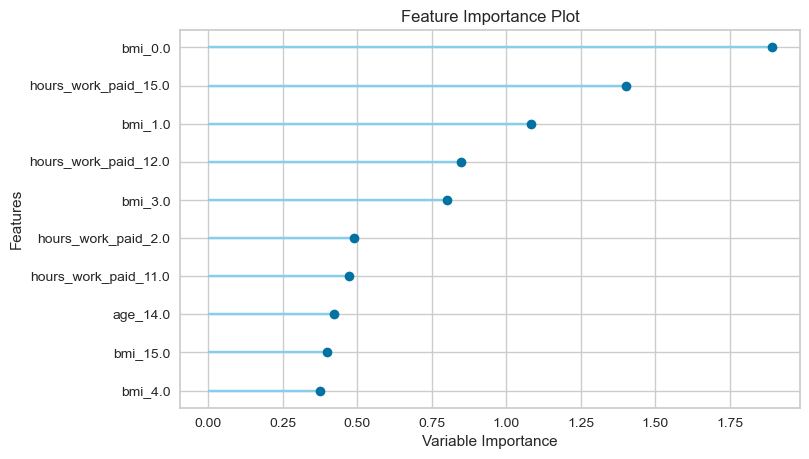

In [48]:
plot_model(lr, plot = 'feature')

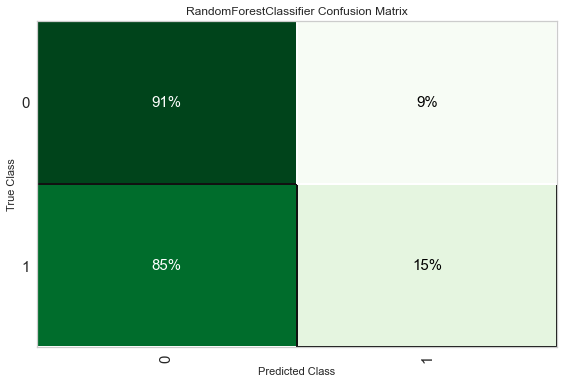

In [57]:
plot_model(rf, plot = 'confusion_matrix',plot_kwargs={'percent':True})

In [58]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

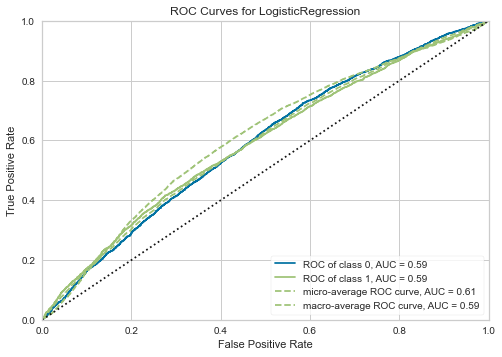

In [50]:
plot_model(lr, plot = 'auc')

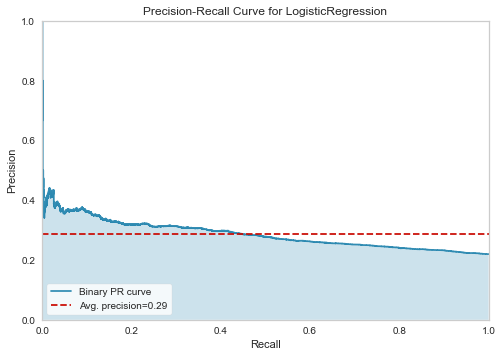

In [51]:
plot_model(lr, plot = 'pr')

In [52]:
predictions = predict_model(lr, data=data_unseen)
predictions.head()

,hours_work_paid,age,bmi,residenc,timeclass,BRS_1,BRS_3,BRS_5,belong8,educ_par2,Label,Score
0,0.0,20.0,25.386111,6,2,0,0,0,0,8,0,0.6518
1,0.0,21.0,21.031478,5,6,0,0,0,0,6,0,0.5489
2,50.0,35.0,35.296306,5,1,0,0,0,0,6,1,0.5325
3,0.0,22.0,22.044766,5,6,0,0,0,0,7,0,0.5876
4,20.0,19.0,26.443866,2,4,0,0,0,0,4,0,0.6135


In [42]:
save_model(lr, 'log_regr_pipeline_v2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='dx_dep1',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                        target_variable='dx_dep1',
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_

In [44]:
predicts = ["4", "22", "22", "1", "1","1","1","1","1","1"]
final = np.array(predicts)
cols = ["hours_work_paid", "age", "bmi", "residenc", "timeclass", "BRS_1", "BRS_3", "BRS_5", "belong8", "educ_par2"]

data_unseen2 = pd.DataFrame([final], columns = cols)
prediction = predict_model(lr, data=data_unseen2, round = 0)
prediction = prediction.Score[0]
prediction

1.0